<a href="https://colab.research.google.com/github/epalomar/03MAIR_IA_AO_2019/blob/master/AG2/AG2_EnriquePalomar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOMBRE:ENRIQUE PALOMAR <br>
LINK: https://colab.research.google.com/drive/1YAfkUr33k9hLIAR9nL1GXOXH-U0AsBXC <br>
ACTIVIDAD GUIADA 2

PROGRAMACIÓN DINAMICA

In [10]:
TARIFAS = [
[0,5,4,3,999,999,999], # desde nodo 0 a cada uno de los posibles destinos
[999,0,999,2,3,999,11], # desde nodo 1 ...
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

def Precios(TARIFAS):
################################################################  
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N] # N*N
  RUTA = [ [""]*N for i in [""]*N]
  
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 



PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [11]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return  "Inicio"
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


La ruta es:


'Inicio,0,2,5'

RAMIFICACIÓN Y PODA. <BR>
ASIGNACIÓN DE AGENTES

In [43]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

COSTES=[[100,0,18,40],
        [0,200,13,22],
        [11,17,899,0],
        [17,14,0,400]]

def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR
  
valor((0, 1, 2, 3),COSTES)

1599

In [0]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range(len(COSTES)):
    if i not in S:
      VALOR += min([COSTES[j][i] for j in range(len(S), len(COSTES))])
  return VALOR

In [0]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)})
  return HIJOS

In [0]:
def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  #Estimacion
  for i in range(  len(COSTES)):
    if i not in S:
      VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

In [0]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0


In [46]:

def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

    print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )

ramificacion_y_poda(COSTES)

La solucion final es: (0, 1, 2, 3)  en  1  iteraciones  para dimension:  4
La solucion final es: (0, 1, 2, 3)  en  2  iteraciones  para dimension:  4
La solucion final es: (0, 1, 2, 3)  en  3  iteraciones  para dimension:  4
La solucion final es: [{'s': (1, 0, 3, 2), 'ci': 0}]  en  4  iteraciones  para dimension:  4
La solucion final es: [{'s': (1, 0, 3, 2), 'ci': 0}]  en  5  iteraciones  para dimension:  4
La solucion final es: [{'s': (1, 0, 3, 2), 'ci': 0}]  en  6  iteraciones  para dimension:  4
La solucion final es: [{'s': (1, 0, 3, 2), 'ci': 0}]  en  7  iteraciones  para dimension:  4
La solucion final es: [{'s': (1, 0, 3, 2), 'ci': 0}]  en  8  iteraciones  para dimension:  4
La solucion final es: [{'s': (1, 0, 3, 2), 'ci': 0}]  en  9  iteraciones  para dimension:  4
La solucion final es: [{'s': (1, 0, 3, 2), 'ci': 0}]  en  10  iteraciones  para dimension:  4


In [47]:
#FUERZA BRUTA
import itertools

def fuerza_bruta(COSTES):
  mejor_valor=10e10
  mejor_sulucion=()
  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp=valor(s,COSTES)
    if valor_tmp<mejor_valor:
      mejor_valor=valor_tmp
      mejor_solucion=s

  print("La mejor solucion es: ", mejor_solucion, " con valor: ", mejor_valor)

fuerza_bruta(COSTES)

La mejor solucion es:  (1, 0, 3, 2)  con valor:  0


In [8]:
# DIMENSION 5
COSTES5=[[11,12,18,40,35],
        [14,15,13,22,45],
        [11,17,19,23,22],
        [17,14,20,28,11],
        [17,14,20,28,34]]



fuerza_bruta(COSTES5)

La mejor solucion es:  (0, 4, 1, 2, 3)  con valor:  72


In [22]:
ramificacion_y_poda(COSTES5)

La solucion final es: (0, 1, 2, 3, 4)  en  1  iteraciones  para dimension:  5
La solucion final es: (0, 1, 2, 3, 4)  en  2  iteraciones  para dimension:  5
La solucion final es: (0, 1, 2, 3, 4)  en  3  iteraciones  para dimension:  5
La solucion final es: (0, 1, 2, 3, 4)  en  4  iteraciones  para dimension:  5
La solucion final es: (0, 1, 2, 3, 4)  en  5  iteraciones  para dimension:  5
La solucion final es: (0, 1, 2, 3, 4)  en  6  iteraciones  para dimension:  5
La solucion final es: [{'s': (0, 2, 3, 4, 1), 'ci': 72}]  en  7  iteraciones  para dimension:  5
La solucion final es: [{'s': (0, 2, 3, 4, 1), 'ci': 72}]  en  8  iteraciones  para dimension:  5
La solucion final es: [{'s': (0, 2, 3, 4, 1), 'ci': 72}]  en  9  iteraciones  para dimension:  5
La solucion final es: [{'s': (0, 2, 3, 4, 1), 'ci': 72}]  en  10  iteraciones  para dimension:  5
La solucion final es: [{'s': (0, 2, 3, 4, 1), 'ci': 72}]  en  11  iteraciones  para dimension:  5
La solucion final es: [{'s': (0, 2, 3, 4, 1),

In [24]:
# DIMENSION 7
COSTES7=[[11,12,18,40,35,54,10],
        [14,15,13,22,45,56,23],
        [11,17,19,23,22,12,53],
        [17,14,20,28,11,24,14],
        [15,11,20,18,34,14,53],
        [1,24,24,18,14,14,43],
        [10,3,23,12,13,41,33]]


fuerza_bruta(COSTES7)

La mejor solucion es:  (5, 6, 1, 4, 3, 2, 0)  con valor:  68


In [26]:
ramificacion_y_poda(COSTES7)

La solucion final es: (0, 1, 2, 3, 4, 5, 6)  en  1  iteraciones  para dimension:  7
La solucion final es: (0, 1, 2, 3, 4, 5, 6)  en  2  iteraciones  para dimension:  7
La solucion final es: (0, 1, 2, 3, 4, 5, 6)  en  3  iteraciones  para dimension:  7
La solucion final es: (0, 1, 2, 3, 4, 5, 6)  en  4  iteraciones  para dimension:  7
La solucion final es: (0, 1, 2, 3, 4, 5, 6)  en  5  iteraciones  para dimension:  7
La solucion final es: (0, 1, 2, 3, 4, 5, 6)  en  6  iteraciones  para dimension:  7
La solucion final es: [{'s': (6, 2, 5, 4, 3, 0, 1), 'ci': 68}]  en  7  iteraciones  para dimension:  7
La solucion final es: [{'s': (6, 2, 5, 4, 3, 0, 1), 'ci': 68}]  en  8  iteraciones  para dimension:  7
La solucion final es: [{'s': (6, 2, 5, 4, 3, 0, 1), 'ci': 68}]  en  9  iteraciones  para dimension:  7
La solucion final es: [{'s': (6, 2, 5, 4, 3, 0, 1), 'ci': 68}]  en  10  iteraciones  para dimension:  7
La solucion final es: [{'s': (6, 2, 5, 4, 3, 0, 1), 'ci': 68}]  en  11  iteraciones

In [38]:
# DIMENSION 10
import numpy as np

COSTES10=np.random.randint(50, size=(10,10))


print(COSTES10)

ramificacion_y_poda(COSTES10)

[[28 37 17 17 10  6 14 41 17 27]
 [16 41 37  3 49 31 45 13 47 44]
 [27 27 39 28 23  1 37  0 37 14]
 [31 45 12 37 18 15 21 43 21 27]
 [49 13  6 29  2 21  6 36 41  7]
 [21 45 34 35 17 25 42 36 14 23]
 [48 43  9 37 49 41 19  9 17 13]
 [11  1 34  5 23  7 21 30  6 15]
 [33 42  9  8 31 26 48  7 20 41]
 [45 24 45  5 21 32 45 43 16 49]]
La solucion final es: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  en  1  iteraciones  para dimension:  10
La solucion final es: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  en  2  iteraciones  para dimension:  10
La solucion final es: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  en  3  iteraciones  para dimension:  10
La solucion final es: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  en  4  iteraciones  para dimension:  10
La solucion final es: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  en  5  iteraciones  para dimension:  10
La solucion final es: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  en  6  iteraciones  para dimension:  10
La solucion final es: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  en  7  iteraciones  para dimension:  10
La solucion

In [39]:
fuerza_bruta(COSTES10)

La mejor solucion es:  (1, 7, 3, 9, 0, 2, 4, 8, 5, 6)  con valor:  85


In [17]:
# DIMENSION 15
import numpy as np

COSTES15=np.random.randint(50, size=(15,15))


print(COSTES15)

ramificacion_y_poda(COSTES15)

[[33 18 40 19 44 10 46 25  3 20 45  3 43 19 26 16 49  6  1 29  9 22 35 16
  26  3 44 27  1  5]
 [17  6 21 43 15 33 44 37  2 28  4 11  2  1 43 19 33 28 38 29 32 41 10  5
  32 31 15 27 45 25]
 [41 35 29 29 29 29 42 32 37 23 45  5 43 21 47 34 48  9 36 48 45 30  4  7
  16 36 21  0 42  5]
 [21 25 43 37 27 34 28 47 37  3 49  9 22 42  1 12 40 35 16 47 37 37 24 23
  26  7 34 24  1 36]
 [ 2 24 16  0 20 23 46 28  1 24  0  0  4  5 47 14 35 41 37 16 41 33 33 33
  32 13 47 42 48 39]
 [20 33 24  8 32 13 29 33 31 25 41 39 36 10  9 23 22 26 16 28 40 32 40 28
  25 10 47 46 18 40]
 [ 2 11 48 44 33 44 26 25 23 41 37 38  5 25 17  3 12  4 46 15 40 47 22 17
  39 18 46 15 17  7]
 [ 9 41 11 11 47 30 16 25 34  5 25  8 33 32 26 21 38 22 15  9 28  7 14 24
  20 43 28 22 47 46]
 [10 26 16 16 17 42  0 44 17 31 11 17  0 30 49  8 47 48  9  4 10  7 32 18
  25 18  3  3  8  8]
 [47 35  6  1  4 39 32 41 10  8  8 13 31 21 32 16 43 32 23 35 22 19 25  1
  35 23 37  5 29 35]
 [26  4 49 25 48 23 40 34 47 35 11 21 49 11 28  5 

KeyboardInterrupt: ignored

In [0]:
fuerza_bruta(COSTES15)

Se han realizado pruebas con matrices de dimension 5, 7, 10 y 15<br>

El agoritmo de fuerza bruta tiene una dimension de n elvado a n, siendo n la dimension de la matriz

Con una matriz de dimension 15 el algoritmo de fuerza_bruta se queda colgado. Dependerá de la maquina donde se ejecute. En nuestro caso con dimension 15 deja de ser una opción.

Para el caso del algoritmo de ramificación y poda, tambien dependerá de la maquina. He probado con una matriz de 30 x 30, y la solución final no cambia a pesar de las continuas iteraciones. No se cuelga la maquina pero tarda mucho en terminar.

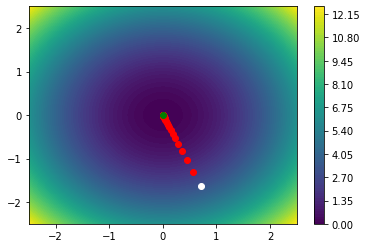

Solucion: [2.4708305750040384e-49, -5.720560083703736e-49] 3.882981140163928e-97


In [33]:
#DESCENSO DE GRADIENTE

import math
import matplotlib.pyplot as plt
import numpy as np
import random

f = lambda X: X[0]**2+X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

resolucion = 100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy][ix] = f([x,y])

plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

P=[random.uniform(-2,2), random.uniform(-2,2)]
plt.plot(P[0],P[1],"o",c="white")

TA=.1
for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0], P[1]- TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:", P ,f(P))

In [38]:
f = lambda X: np.sin(1/2 *X[0]**2 -1/4*X[1]**2 +3) *np.cos(2*X[0]+1 -np.e**X[1])

def df(PUNTO):
  h=0.01
  T=np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it]= T[it] + h
    grad[it]=(f(T) -f(PUNTO)) /h
  return grad

df(P)

array([-0.0077713, -0.0031734])